In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Activation,Add,Dense,Conv1D,MaxPooling1D,AveragePooling1D,Flatten,GlobalMaxPooling1D,Dropout,BatchNormalization,Input,Activation,GlobalAveragePooling1D
from keras import callbacks
from tensorflow.keras.utils import to_categorical

In [64]:
import tensorflow as tf
import keras

In [50]:
train = pd.read_csv('D:\\ML\\DL Repo\\digit-recognizer\\Data\\train.csv')
test = pd.read_csv('D:\\ML\\DL Repo\\digit-recognizer\\Data\\test.csv')

In [51]:
X = np.array(train[train.columns[1:]])
y = train['label']

In [52]:
y = to_categorical(y)

In [53]:
X.shape,y.shape

((42000, 784), (42000, 10))

In [54]:
X = X.reshape((X.shape[0],X.shape[1],1))

In [10]:
X = X/255

In [11]:
X.dtype

dtype('float64')

In [58]:
def make_model():    
    input_shape = X.shape[1:]
    num_classes = 10

    input_layer = Input(input_shape)
    input_layer = BatchNormalization()(input_layer)


    conv1 = Conv1D(filters=64, kernel_size=3, padding="same", use_bias = False)(input_layer)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    
    conv2 = Conv1D(filters=64, kernel_size=3, padding="same", use_bias = False)(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    
    conv3 = Conv1D(filters=64, kernel_size=3, padding="same", use_bias = False)(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    gap = AveragePooling1D()(conv3)
    gap = Flatten()(gap)
    gap = Dropout(0.5)(gap)

    output_layer = Dense(num_classes, activation="softmax")(gap)

    return Model(inputs=input_layer, outputs=output_layer)


model = make_model()

In [59]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
callbacks = [callbacks.ModelCheckpoint("D:\\ML\\DL Repo\\digit-recognizer\\model\\best_1D_CNN_model.h5", save_best_only=True, monitor="val_loss"),
             callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
             callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1)]

In [60]:
history = model.fit(X,y,epochs=500,batch_size=128,validation_split=0.2,callbacks=callbacks)

Epoch 1/500
263/263 [==============================] - 7s 22ms/step - loss: 0.3559 - accuracy: 0.9021 - val_loss: 0.4625 - val_accuracy: 0.8777 - lr: 0.0010
Epoch 2/500
263/263 [==============================] - 6s 21ms/step - loss: 0.1729 - accuracy: 0.9482 - val_loss: 0.2262 - val_accuracy: 0.9363 - lr: 0.0010
Epoch 3/500
263/263 [==============================] - 6s 21ms/step - loss: 0.1263 - accuracy: 0.9612 - val_loss: 0.1384 - val_accuracy: 0.9592 - lr: 0.0010
Epoch 4/500
263/263 [==============================] - 6s 21ms/step - loss: 0.1118 - accuracy: 0.9654 - val_loss: 0.1342 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 5/500
263/263 [==============================] - 6s 21ms/step - loss: 0.0852 - accuracy: 0.9725 - val_loss: 0.1121 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 6/500
263/263 [==============================] - 6s 21ms/step - loss: 0.0773 - accuracy: 0.9753 - val_loss: 0.1210 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 7/500
263/263 [==============================] - 6s 

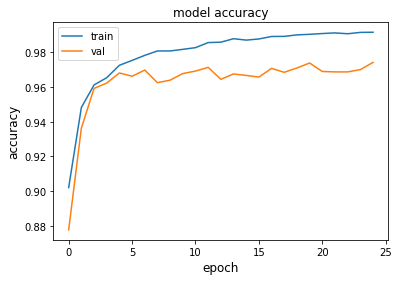

In [61]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [65]:
model = keras.models.load_model('D:\\ML\\DL Repo\\digit-recognizer\\model\\best_1D_CNN_model.h5')

In [66]:
test_y = model.predict(test)

In [67]:
dic = {'ImageId':[],'Label':[]}
for i in range(len(test_y)):
    dic['ImageId'].append(i+1)
    dic['Label'].append(np.argmax(test_y[i]))

In [68]:
test_df = pd.DataFrame.from_dict(dic)
test_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3


In [69]:
test_df.to_csv('D:\\ML\\DL Repo\\digit-recognizer\\Out\\my_submission_file_1D_CNN.csv', index=False)